In [1]:
from glob import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RESULTS = glob(os.path.join("set_rank_results_conv_cifar100", "*.json"))
results = pd.DataFrame([json.load(open(file)) for file in RESULTS])
results["best_val_categorical_accuracy"] = results["val_categorical_accuracy"].map(np.max)
results.head()

,initial_rank,new_rank,rank_update_epoch,total_epochs,loss,categorical_accuracy,val_loss,val_categorical_accuracy,pre_update_loss,pre_update_categorical_accuracy,pre_update_val_loss,pre_update_val_categorical_accuracy,post_update_loss,post_update_categorical_accuracy,post_update_val_loss,post_update_val_categorical_accuracy,best_val_categorical_accuracy
0,-1,1,3,50,"[4.227800369262695, 3.734773635864258, 3.44326...","[0.05405999720096588, 0.13387998938560486, 0.1...","[3.965761661529541, 3.5441818237304688, 3.3739...","[0.08879999816417694, 0.16859999299049377, 0.1...",3.326760,0.20252,3.373964,0.1986,3.326760,0.20252,3.373964,0.1986,0.4222
1,-1,10,2,50,"[4.193930149078369, 3.6461355686187744, 3.3890...","[0.06360000371932983, 0.15112000703811646, 0.1...","[3.839142084121704, 3.529560089111328, 3.32964...","[0.11630000174045563, 0.17299999296665192, 0.2...",3.485831,0.18218,3.529580,0.1730,3.485831,0.18218,3.529580,0.1730,0.4158
2,-1,50,1,50,"[4.211894989013672, 3.7534401416778564, 3.5121...","[0.0566600002348423, 0.12629999220371246, 0.16...","[3.9092013835906982, 3.631721019744873, 3.4621...","[0.1021999940276146, 0.1467999964952469, 0.178...",3.886894,0.10422,3.909202,0.1022,3.886894,0.10422,3.909202,0.1022,0.4323
3,-1,160,1,50,"[4.156297206878662, 3.667863130569458, 3.45413...","[0.06351999938488007, 0.14005999267101288, 0.1...","[3.8320679664611816, 3.573089122772217, 3.3919...","[0.12039999663829803, 0.15780000388622284, 0.1...",3.816803,0.11748,3.832068,0.1203,3.816803,0.11748,3.832068,0.1203,0.4201
4,-1,10,3,50,"[4.208507061004639, 3.774122476577759, 3.52627...","[0.05593999847769737, 0.1240599974989891, 0.16...","[3.936525583267212, 3.6506218910217285, 3.4352...","[0.09569999575614929, 0.1477999985218048, 0.18...",3.391030,0.18912,3.435238,0.1859,3.391030,0.18912,3.435238,0.1859,0.4253


In [3]:
results["new_rank"].unique(), results["rank_update_epoch"].unique()

(array([  1,  10,  50, 160]), array([3, 2, 1]))

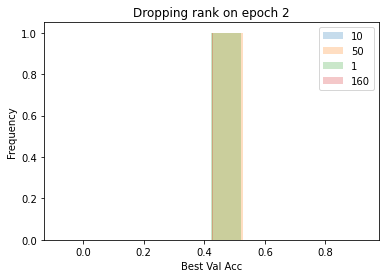

best_val_categorical_accuracy      
                                  mean count
new_rank                                    
1                             0.420900     1
10                            0.422767     3
50                            0.426600     1
160                           0.423125     4

In [12]:
update_epoch = 2
epoch_results = results.loc[
    results["rank_update_epoch"] == update_epoch,
    ["new_rank", "best_val_categorical_accuracy"]
]
for new_rank in epoch_results["new_rank"].unique():
    plt.hist(
        epoch_results.loc[epoch_results["new_rank"] == new_rank, ["best_val_categorical_accuracy"]],
        label=f"{new_rank}",
        # bins=10,
        alpha=0.25)
plt.title(f"Dropping rank on epoch {update_epoch}")
plt.xlabel("Best Val Acc")
plt.ylabel("Frequency")
plt.legend()
plt.show()
epoch_results.groupby("new_rank").agg({"best_val_categorical_accuracy": ["mean", "count"]})